In [1]:
import numpy as np

In [2]:
X_train = np.genfromtxt("Data/X_train.csv", delimiter=',')
y_train = np.genfromtxt("Data/y_train.csv", delimiter=',')

In [3]:
from sklearn import tree

In [4]:
tree_clf = tree.DecisionTreeClassifier(random_state=0)

In [18]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [22]:
len(ccp_alphas)

883

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

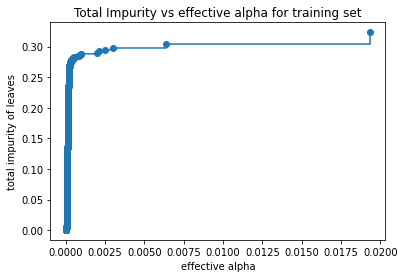

In [20]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [21]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0511692331247412


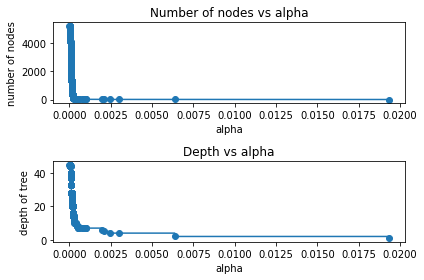

In [23]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

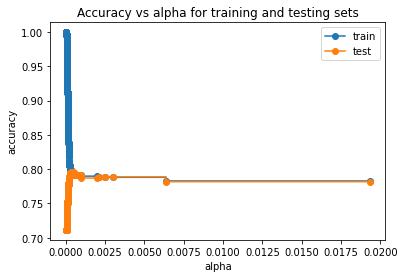

In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

In [13]:
import pandas as pd

In [14]:
pd.DataFrame(data=[accuracy_score(y_train, preds),
                   recall_score(y_train, preds),
                   precision_score(y_train, preds),
                   f1_score(y_train, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.999652
recall,0.998605
precision,1.000000
f1_score,0.999302


In [15]:
X_test = np.genfromtxt("Data/X_test.csv", delimiter=',')
y_test = np.genfromtxt("Data/y_test.csv", delimiter=',')

In [16]:
y_test_pred = tree_clf.predict(X_test)

In [17]:
pd.DataFrame(data=[accuracy_score(y_test, y_test_pred),
                   recall_score(y_test, y_test_pred),
                   precision_score(y_test, y_test_pred),
                   f1_score(y_test, y_test_pred)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.714901
recall,0.464641
precision,0.432683
f1_score,0.448093
